In [4]:
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization.wcsaxes.frame import EllipticalFrame

In [2]:
!pip install astroquery

#Uses astroquery to plot all GAIA events from Vizier within a radius. 

from astroquery.vizier import Vizier
from astropy.coordinates import Angle

#adjust Angle(2,arcmin) to desired radius

Vizier.ROW_LIMIT = -1
v = Vizier.query_object("NGC6540", radius=Angle(20,'arcmin'), catalog='Gaia')

print(v)

TableList with 18 tables:
	'0:I/324/igsl3' with 18 column(s) and 1110071 row(s) 
	'1:I/337/gaia' with 14 column(s) and 124636 row(s) 
	'2:I/337/tgas' with 20 column(s) and 61 row(s) 
	'3:I/337/tgasptyc' with 22 column(s) and 61 row(s) 
	'4:I/345/gaia2' with 32 column(s) and 313823 row(s) 
	'5:I/345/rrlyrae' with 23 column(s) and 14 row(s) 
	'6:I/345/lpv' with 13 column(s) and 31 row(s) 
	'7:I/345/varres' with 9 column(s) and 131 row(s) 
	'8:I/345/ssoobs' with 7 column(s) and 18 row(s) 
	'9:I/347/gaia2dis' with 9 column(s) and 192097 row(s) 
	'10:I/350/gaiaedr3' with 39 column(s) and 388562 row(s) 
	'11:I/350/tyc2tdsc' with 16 column(s) and 98 row(s) 
	'12:I/350/comscanl' with 13 column(s) and 35 row(s) 
	'13:I/352/gedr3dis' with 10 column(s) and 228167 row(s) 
	'14:VI/137/gum_mw' with 17 column(s) and 1071235 row(s) 
	'15:VI/137/gum_gal' with 11 column(s) and 20 row(s) 
	'16:VI/137/gum_sn' with 9 column(s) and 1 row(s) 
	'17:VI/145/attitude' with 18 column(s) and 33 row(s) 


/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'HIP' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'PS1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'SDSSDR13' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'SkyMapper2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kalgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: TableReplaceWarning: converted column 'URAT1' from integer to floa

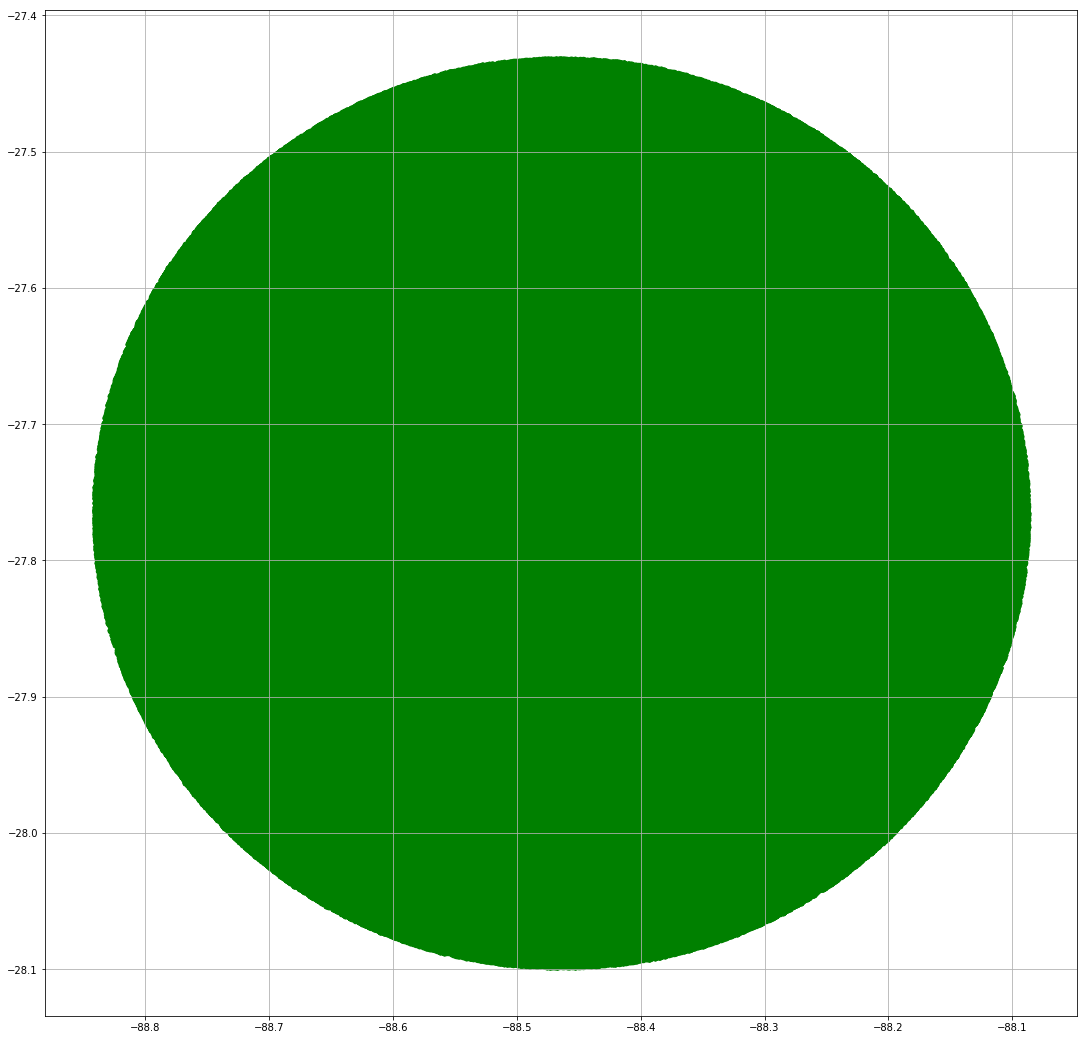

In [5]:
#plotting all of the Gaia data
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization.wcsaxes.frame import EllipticalFrame

coords = pd.DataFrame(columns=['RAJ2000','DEJ2000']) #columns in the data
for table_name in v.keys():
  table = v[table_name]
  df = table.to_pandas() #converting to pandas 
  if 'RAJ2000' in df.columns: #the columns have different names so if we find RAJ2000 use this
    coords = pd.concat([coords,df[['RAJ2000','DEJ2000']]]) 
  elif 'RA_ICRS' in df.columns: #this is if we find RA_ICRS
    df = df.rename(columns={'RA_ICRS':'RAJ2000','DE_ICRS':'DEJ2000'}) 
    coords = pd.concat([coords,df[['RAJ2000','DEJ2000']]])


fig = plt.figure()
plt.grid(True)
fig.set_size_inches(18.5, 18.5, forward=True)
ax = fig.add_subplot(111)
ax.scatter(x=coords['RAJ2000']-360, y=coords['DEJ2000'], color='g', s=20) #the -360 is to wrap
#plt.axis([-88.475, -88.45, -27.75, -27.775])

#print(df)


           RAJ2000    DEJ2000     Plx      Distance
167     271.501442 -28.090236  0.1700   5882.352879
4500    271.435333 -27.993911  1.3000    769.230797
6468    271.733094 -28.045330  1.1300    884.955756
13946   271.625865 -28.053148  2.1400    467.289697
15845   271.505423 -28.032133  0.9000   1111.111141
17810   271.664775 -28.012701  1.0300    970.873813
20075   271.719726 -27.944266  0.8100   1234.567898
22439   271.649245 -27.910433  0.8600   1162.790678
22885   271.666606 -27.884615  0.8000   1249.999981
25480   271.536275 -27.927028  1.1600    862.068990
25574   271.451811 -27.982568  0.9000   1111.111141
25995   271.486748 -27.949713  1.8000    555.555570
32974   271.560727 -27.843965  1.6300    613.496934
33818   271.741693 -27.928102  3.4100    293.255125
35386   271.809558 -27.868889  0.8100   1234.567898
36531   271.728951 -27.867147  1.3200    757.575727
38879   271.822232 -27.823488  6.2700    159.489634
45478   271.645222 -27.734608  1.2300    813.008117
50813   271.

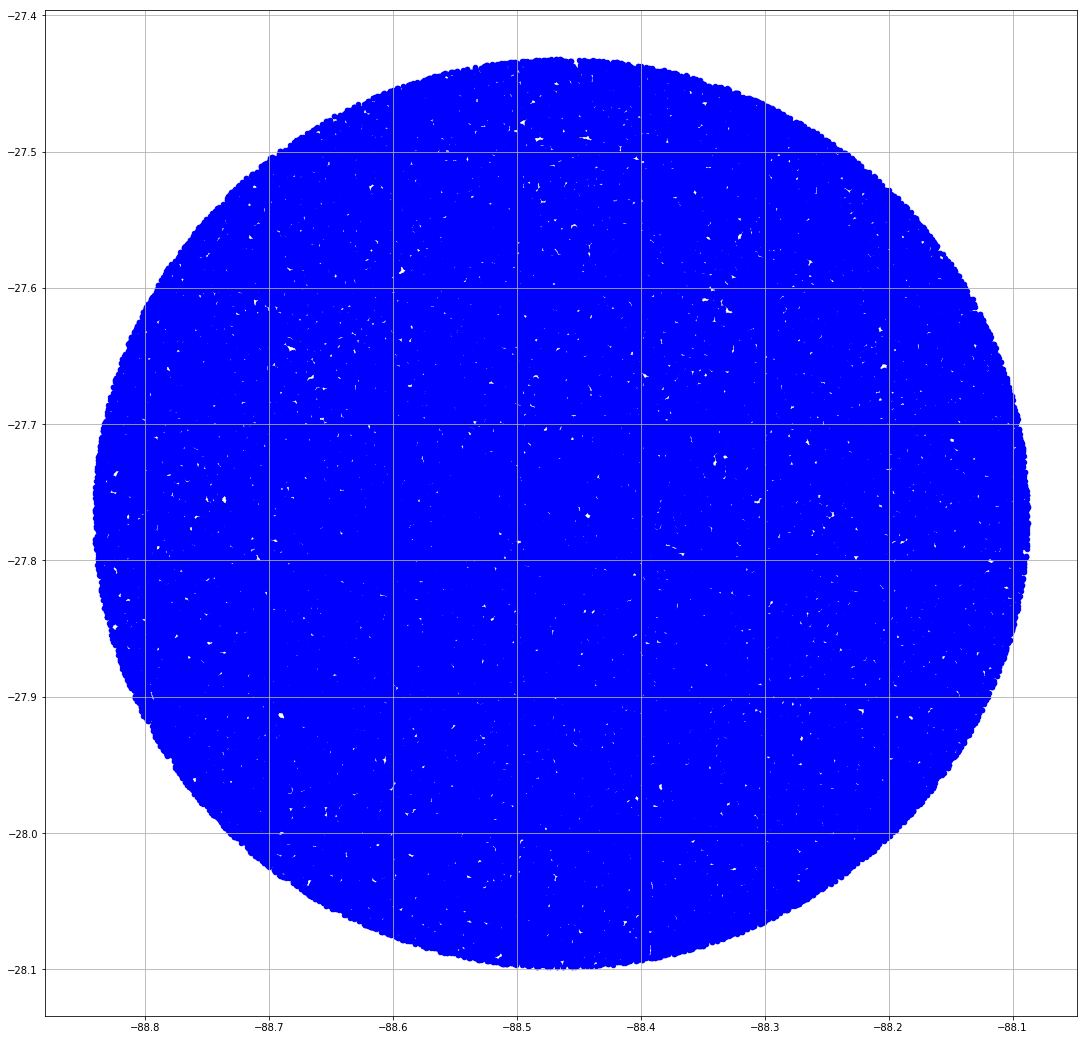

In [6]:
#FRONT PLANE
coords_plx = pd.DataFrame(columns=['RAJ2000','DEJ2000','Plx'])
for table_name in v.keys():
  table = v[table_name]
  df = table.to_pandas()
  if 'Plx' in df.columns:
    if 'RAJ2000' in df.columns:
      coords_plx = pd.concat([coords_plx,df[['RAJ2000','DEJ2000','Plx']]])
    elif 'RA_ICRS' in df.columns:
      df = df.rename(columns={'RA_ICRS':'RAJ2000','DE_ICRS':'DEJ2000'})
      coords_plx = pd.concat([coords_plx,df[['RAJ2000','DEJ2000','Plx']]])

coords_plxdist = coords_plx.copy()
coords_plxdist.dropna(subset=["Plx"], inplace=True)
coords_plxdist['Distance'] = 1/(coords_plxdist['Plx']/1000) #calculating distance from parallax
print(coords_plxdist)

##cond = {'Distance'>0 & 'Distance'<5.3}
#df.loc[(df.a == cond['Distance']) & (df.b == cond['b']), ['x','y']].plot(title='a: {a}, b: {b}'.format(**cond))

front= coords_plxdist[coords_plxdist.Distance<5225] #identifying depth boundaries for this plane
front= front[front.Distance>0]
fig = plt.figure()
plt.grid(True)
fig.set_size_inches(18.5, 18.5, forward=True)
ax = fig.add_subplot(111)
ax.scatter(x=front['RAJ2000']-360, y=front['DEJ2000'], color='b', s=20)

           RAJ2000    DEJ2000     Plx      Distance
167     271.501442 -28.090236  0.1700   5882.352879
4500    271.435333 -27.993911  1.3000    769.230797
6468    271.733094 -28.045330  1.1300    884.955756
13946   271.625865 -28.053148  2.1400    467.289697
15845   271.505423 -28.032133  0.9000   1111.111141
17810   271.664775 -28.012701  1.0300    970.873813
20075   271.719726 -27.944266  0.8100   1234.567898
22439   271.649245 -27.910433  0.8600   1162.790678
22885   271.666606 -27.884615  0.8000   1249.999981
25480   271.536275 -27.927028  1.1600    862.068990
25574   271.451811 -27.982568  0.9000   1111.111141
25995   271.486748 -27.949713  1.8000    555.555570
32974   271.560727 -27.843965  1.6300    613.496934
33818   271.741693 -27.928102  3.4100    293.255125
35386   271.809558 -27.868889  0.8100   1234.567898
36531   271.728951 -27.867147  1.3200    757.575727
38879   271.822232 -27.823488  6.2700    159.489634
45478   271.645222 -27.734608  1.2300    813.008117
50813   271.

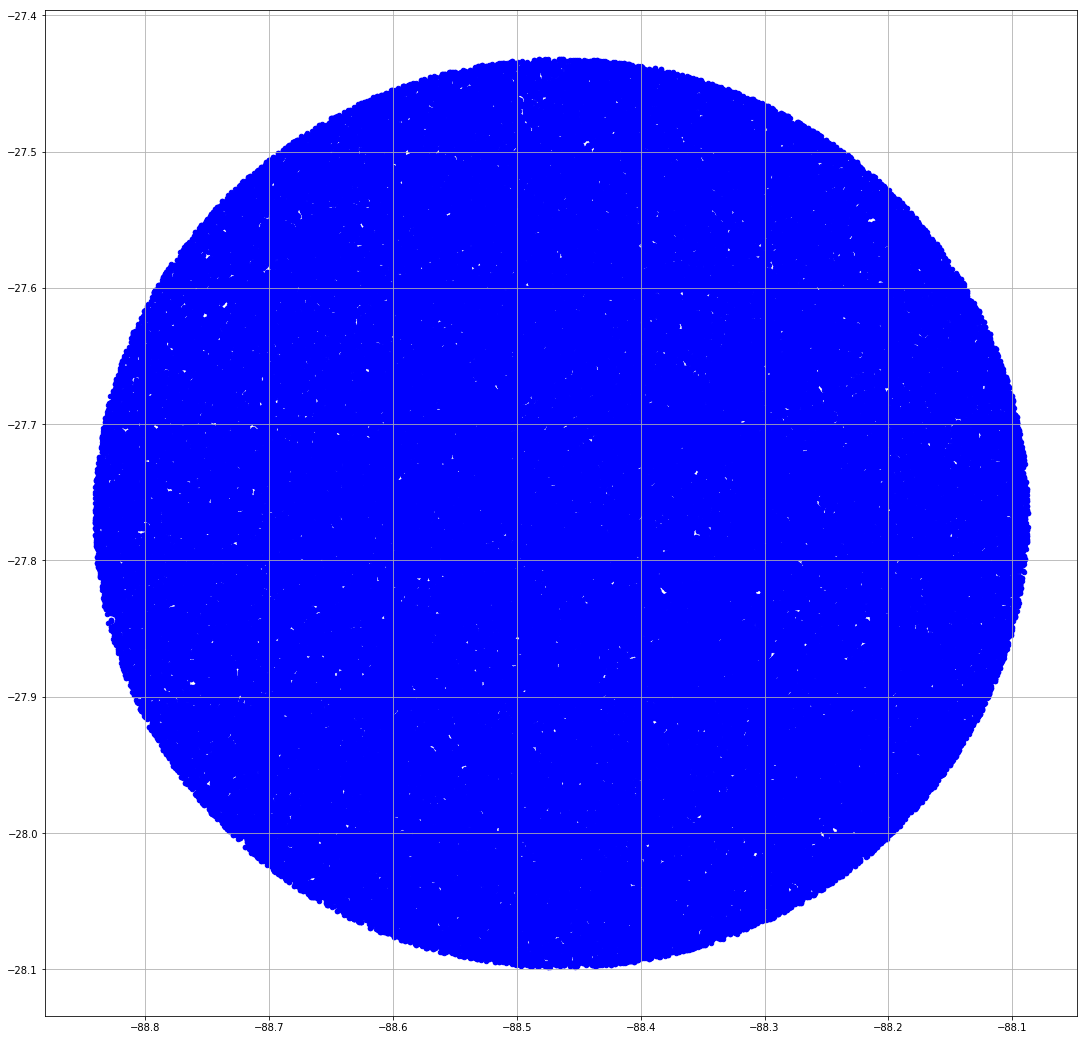

In [11]:
#BACK PLANE
coords_plx = pd.DataFrame(columns=['RAJ2000','DEJ2000','Plx'])
for table_name in v.keys():
  table = v[table_name]
  df = table.to_pandas()
  if 'Plx' in df.columns:
    if 'RAJ2000' in df.columns:
      coords_plx = pd.concat([coords_plx,df[['RAJ2000','DEJ2000','Plx']]])
    elif 'RA_ICRS' in df.columns:
      df = df.rename(columns={'RA_ICRS':'RAJ2000','DE_ICRS':'DEJ2000'})
      coords_plx = pd.concat([coords_plx,df[['RAJ2000','DEJ2000','Plx']]])

coords_plxdist = coords_plx.copy()
coords_plxdist.dropna(subset=["Plx"], inplace=True)
coords_plxdist['Distance'] = 1/(coords_plxdist['Plx']/1000)
print(coords_plxdist)

##cond = {'Distance'>0 & 'Distance'<5.3}
#df.loc[(df.a == cond['Distance']) & (df.b == cond['b']), ['x','y']].plot(title='a: {a}, b: {b}'.format(**cond))

Back1 = coords_plxdist[coords_plxdist.Distance > 5375]
Back2 = coords_plxdist[coords_plxdist.Distance < 0]
backplane = pd.concat([Back1,Back2])
fig = plt.figure()
plt.grid(True)
fig.set_size_inches(18.5, 18.5, forward=True)
ax = fig.add_subplot(111)
ax.scatter(x=backplane['RAJ2000']-360, y=backplane['DEJ2000'], color='b', s=20)

           RAJ2000    DEJ2000     Plx      Distance
167     271.501442 -28.090236  0.1700   5882.352879
4500    271.435333 -27.993911  1.3000    769.230797
6468    271.733094 -28.045330  1.1300    884.955756
13946   271.625865 -28.053148  2.1400    467.289697
15845   271.505423 -28.032133  0.9000   1111.111141
17810   271.664775 -28.012701  1.0300    970.873813
20075   271.719726 -27.944266  0.8100   1234.567898
22439   271.649245 -27.910433  0.8600   1162.790678
22885   271.666606 -27.884615  0.8000   1249.999981
25480   271.536275 -27.927028  1.1600    862.068990
25574   271.451811 -27.982568  0.9000   1111.111141
25995   271.486748 -27.949713  1.8000    555.555570
32974   271.560727 -27.843965  1.6300    613.496934
33818   271.741693 -27.928102  3.4100    293.255125
35386   271.809558 -27.868889  0.8100   1234.567898
36531   271.728951 -27.867147  1.3200    757.575727
38879   271.822232 -27.823488  6.2700    159.489634
45478   271.645222 -27.734608  1.2300    813.008117
50813   271.

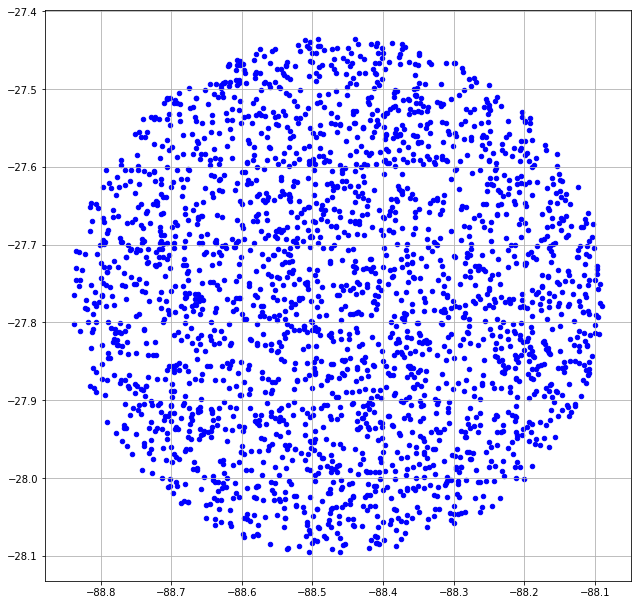

In [8]:
#CLUSTER PLANE
coords_plx = pd.DataFrame(columns=['RAJ2000','DEJ2000','Plx'])
for table_name in v.keys():
  table = v[table_name]
  df = table.to_pandas()
  if 'Plx' in df.columns:
    if 'RAJ2000' in df.columns:
      coords_plx = pd.concat([coords_plx,df[['RAJ2000','DEJ2000','Plx']]])
    elif 'RA_ICRS' in df.columns:
      df = df.rename(columns={'RA_ICRS':'RAJ2000','DE_ICRS':'DEJ2000'})
      coords_plx = pd.concat([coords_plx,df[['RAJ2000','DEJ2000','Plx']]])

coords_plxdist = coords_plx.copy()
coords_plxdist.dropna(subset=["Plx"], inplace=True)
coords_plxdist['Distance'] = 1/(coords_plxdist['Plx']/1000)
print(coords_plxdist)

##cond = {'Distance'>0 & 'Distance'<5.3}
#df.loc[(df.a == cond['Distance']) & (df.b == cond['b']), ['x','y']].plot(title='a: {a}, b: {b}'.format(**cond))

cluster= coords_plxdist[coords_plxdist.Distance<5375]
cluster= cluster[cluster.Distance>5225]
fig = plt.figure()
plt.grid(True)
fig.set_size_inches(10.5, 10.5, forward=True)
ax = fig.add_subplot(111)
ax.scatter(x=cluster['RAJ2000']-360, y=cluster['DEJ2000'], color='b', s=20)
print(len(cluster))

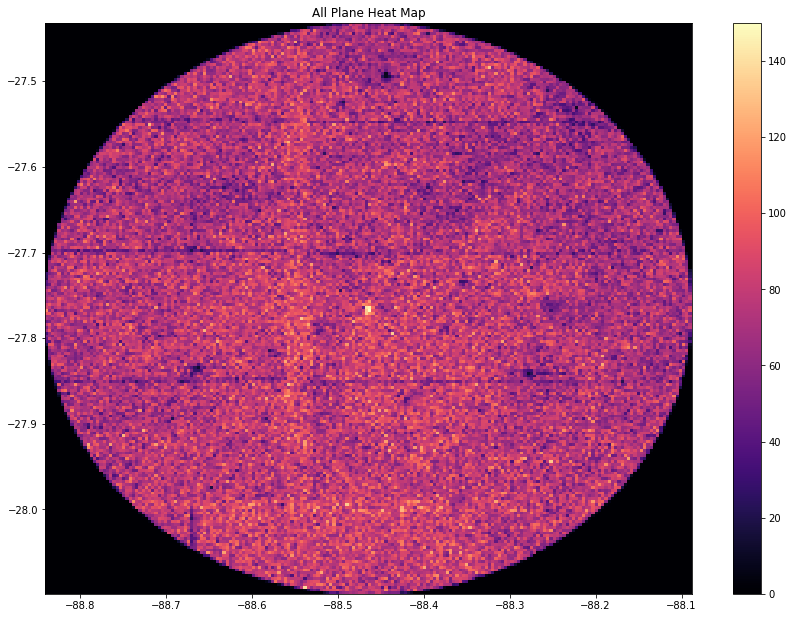

In [12]:
#ALL THE PLANES
x = coords['RAJ2000']-360 #wrapping all of the data
y = coords['DEJ2000']
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10.5, forward=True)
plt.hist2d(x,y,bins=(200), cmap='magma')
plt.title('All Plane Heat Map')
plt.colorbar()
plt.show()


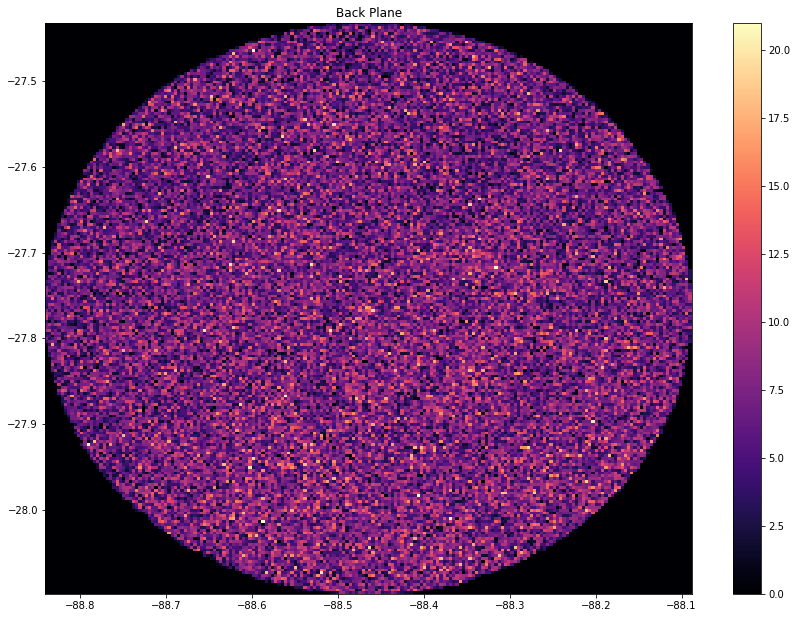

In [13]:
#BACK PLANE
x_back= backplane['RAJ2000']-360
y_back= backplane['DEJ2000']
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10.5, forward=True)
plt.hist2d(x_back,y_back,bins=(200), cmap='magma')
plt.title("Back Plane")
plt.colorbar()
plt.show()

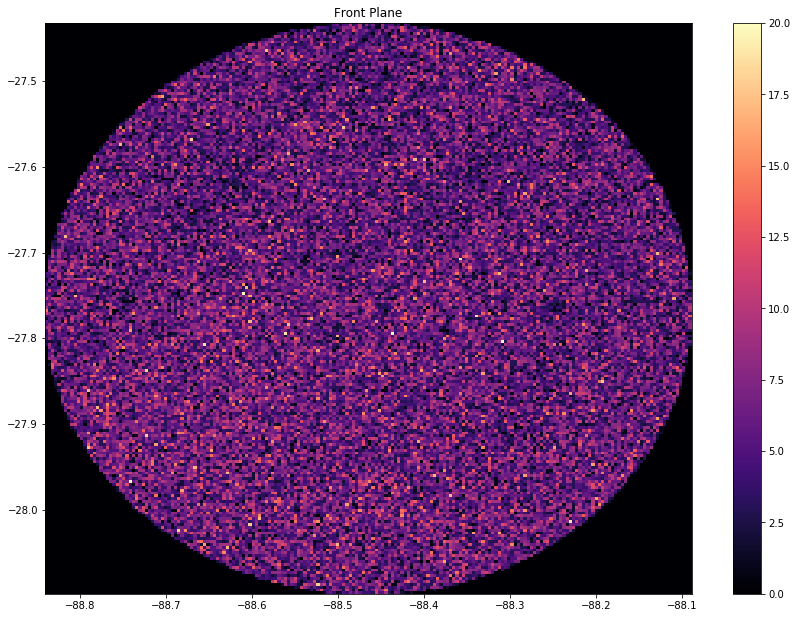

In [14]:
#FRONT PLANE
x_front = front['RAJ2000']-360
y_front = front['DEJ2000']
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10.5, forward=True)
plt.hist2d(x_front,y_front,bins=(200), cmap='magma')
plt.title("Front Plane")
plt.colorbar()
plt.show()

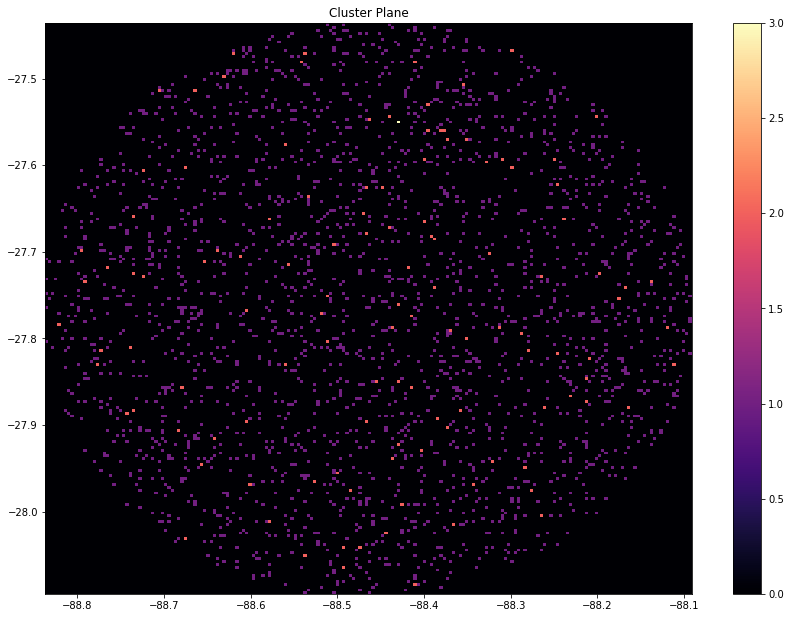

In [15]:
#CLUSTER PLANE
x_mid = cluster['RAJ2000']-360
y_mid = cluster['DEJ2000']
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10.5, forward=True)
plt.hist2d(x_mid,y_mid,bins=(200), cmap='magma')
plt.title("Cluster Plane")
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'KMT+OGLE Data')

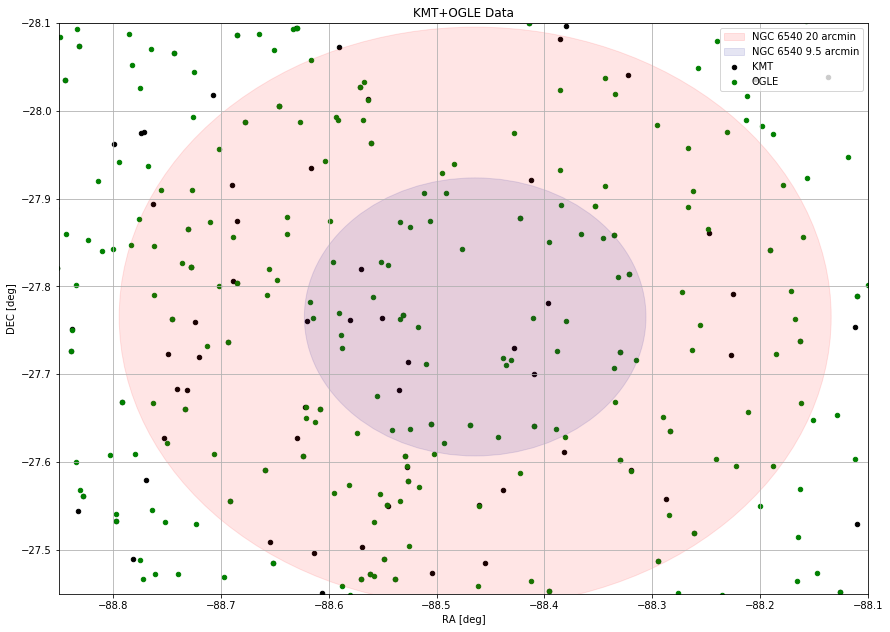

In [17]:
#importing the KMT and OGLE csvs
KMT_df= pd.read_csv('/Users/kalgi/Desktop/KMTNet_2015-2021_data.csv')
OGLE_df=pd.read_csv('/Users/kalgi/Desktop/OGLE_1998-2019_data.csv')

import astropy.coordinates as coord
#plotting KMT + OGLE data...same technique

#NGC_coords = SkyCoord(custom_range['RA'],custom_range['Dec'], unit=(u.hourangle, u.deg))
#NGC_ra = coord.Angle(NGC_coords.ra.degree*u.degree)
#NGC_ra = NGC_ra.wrap_at(180*u.degree)
#NGC_dec = coord.Angle(NGC_coords.dec.degree*u.degree)


KMT_all_coords = SkyCoord(KMT_df['RA'],KMT_df['Dec'], unit=(u.hourangle, u.deg))
KMT_all_ra = coord.Angle(KMT_all_coords.ra.degree*u.degree)
KMT_all_ra = KMT_all_ra.wrap_at(180*u.degree)
KMT_all_dec = coord.Angle(KMT_all_coords.dec.degree*u.degree)

OGLE_all_coords = SkyCoord(OGLE_df['RA (J2000)'], OGLE_df['Dec (J2000)'], unit=(u.hourangle, u.deg))
OGLE_all_ra = coord.Angle(OGLE_all_coords.ra.degree*u.degree)
OGLE_all_ra = OGLE_all_ra.wrap_at(180*u.degree)
OGLE_all_dec = coord.Angle(OGLE_all_coords.dec.degree*u.degree)

#GAIA_all_coords = SkyCoord(GAIA_df['ra'],GAIA_df['dec'], unit=(u.deg, u.deg))
#GAIA_all_ra = coord.Angle(GAIA_all_coords.ra.degree*u.degree)
#GAIA_all_ra = GAIA_all_ra.wrap_at(180*u.degree)
#GAIA_all_dec = coord.Angle(GAIA_all_coords.dec.degree*u.degree)

#coords = pd.DataFrame(columns=['RAJ2000','DEJ2000'])
#for table_name in v.keys():
  #table = v[table_name]
  #df = table.to_pandas()
  #if 'RAJ2000' in df.columns:
    #coords = pd.concat([coords,df[['RAJ2000','DEJ2000']]])
 # elif 'RA_ICRS' in df.columns:
    #df = df.rename(columns={'RA_ICRS':'RAJ2000','DE_ICRS':'DEJ2000'})
    #coords = pd.concat([coords,df[['RAJ2000','DEJ2000']]])


fig = plt.figure()
plt.grid(True)
fig.set_size_inches(14.5, 10.5, forward=True)
ax = fig.add_subplot(111)
ax.scatter(KMT_all_ra.degree, KMT_all_dec.degree,20, color='black', label='KMT')
ax.scatter(OGLE_all_ra.degree, OGLE_all_dec.degree,20, color='g', label='OGLE')
#ax.scatter(x=coords['RAJ2000']-360, y=coords['DEJ2000'], color='y', s=20, label='GAIA')
#ax.scatter(GAIA_all_ra.degree, GAIA_all_dec.degree,20, color='black',label='GAIA')
#ax.scatter(NGC_ra.degree, NGC_dec.degree, color = 'r')
plt.axis([-88.85, -88.1,  -27.45, -28.1])
plt.legend(loc="upper right")

NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.33, color='r', alpha=0.1, label='NGC 6540 20 arcmin') #the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region)
NGC6540_cluster = plt.Circle((-88.4641667, -27.7653), 0.15833, color='darkblue', alpha=0.1, label='NGC 6540 9.5 arcmin') #the galactic coordinates with rad of 0.15833 deg
ax.add_patch(NGC6540_cluster)
plt.legend(loc="upper right")
ax.set_xlabel("RA [deg]")
ax.set_ylabel("DEC [deg]")
plt.title("KMT+OGLE Data")

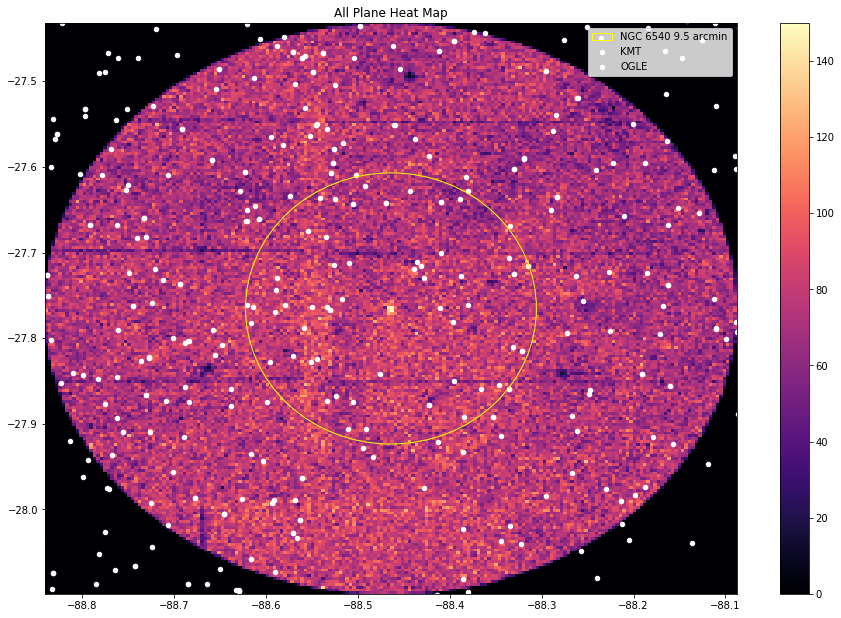

In [21]:
#ALL THE PLANES
x = coords['RAJ2000']-360 #wrapping all of the data
y = coords['DEJ2000']
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 10.5, forward=True)
plt.hist2d(x,y,bins=(200), cmap='magma')
ax.scatter(KMT_all_ra.degree, KMT_all_dec.degree,20, color='white', label='KMT')
ax.scatter(OGLE_all_ra.degree, OGLE_all_dec.degree,20, color='white', label='OGLE')
#NGC6540_region = plt.Circle((-88.4641667, -27.7653), 0.333333, color='r', alpha=0.3, label='NGC 6540 20 arcmin') #the galactic coordinates with rad of 0.33 deg
#ax.add_patch(NGC6540_region)
NGC6540_cluster = plt.Circle((-88.4641667, -27.7653), 0.15833, color='yellow', fill=False, label='NGC 6540 9.5 arcmin') #the galactic coordinates with rad of 0.15833 deg
ax.add_patch(NGC6540_cluster)
plt.title('All Plane Heat Map')
plt.legend(loc='upper right')
plt.colorbar()
plt.show()



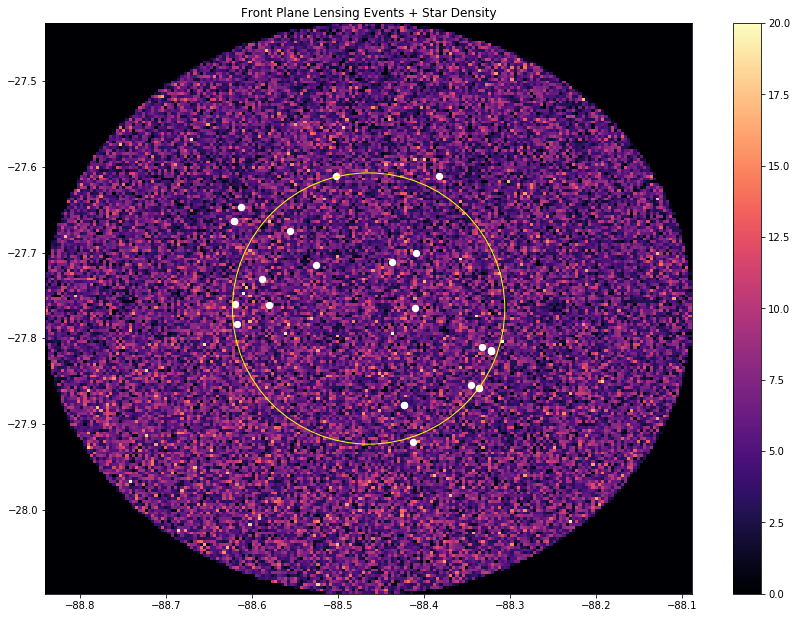

In [89]:
# CROSS MATCHED OGLE DATA FRONT PLANE
import astropy.coordinates as coord


OGLE_df=pd.read_csv('/Users/kalgi/Desktop/ngc6540-region-gaia-ogle-xmatch.csv')

OGLE_X_coords = SkyCoord(OGLE_df['ra'],OGLE_df['dec'], unit=(u.deg, u.deg))
OGLE_X_ra = coord.Angle(OGLE_X_coords.ra.degree*u.degree)
OGLE_X_ra = OGLE_X_ra.wrap_at(180*u.degree)
OGLE_X_dec = coord.Angle(OGLE_X_coords.dec.degree*u.degree)

KMT_df=pd.read_csv('/Users/kalgi/Desktop/ngc-6540-region-gaia-kmtnet-xmatch.csv')

KMT_X_coords = SkyCoord(KMT_df['ra'],KMT_df['dec'], unit=(u.deg, u.deg))
KMT_X_ra = coord.Angle(KMT_X_coords.ra.degree*u.degree)
KMT_X_ra = KMT_X_ra.wrap_at(180*u.degree)
KMT_X_dec = coord.Angle(KMT_X_coords.dec.degree*u.degree)

'''
plt.axis([-89, -87, -28, -26])

NGC6540_region1 = plt.Circle((-88.4641667, -27.7653), 0.33, color='r', alpha=0.3) #the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region1)
'''

front_X = OGLE_df[OGLE_df.distance > 0]
front_X = front_X[front_X.distance < 5.225]

front_X_KMT = KMT_df[KMT_df.distance > 0]
front_X_KMT = front_X_KMT[front_X_KMT.distance < 5.225]

x_front = front['RAJ2000']-360
y_front = front['DEJ2000']

fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10.5, forward=True)
plt.hist2d(x_front,y_front,bins=(200), cmap='magma')
ax.scatter(x=front_X['ra']-360, y=front_X['dec'], color='white', s=40)
ax.scatter(x=front_X_KMT['ra']-360, y=front_X_KMT['dec'], color='white', s=40)
NGC6540_cluster = plt.Circle((-88.4641667, -27.7653), 0.15833, color='yellow', fill=False, label='NGC 6540 9.5 arcmin') #the galactic coordinates with rad of 0.15833 deg
ax.add_patch(NGC6540_cluster)
plt.title("Front Plane Lensing Events + Star Density")
plt.colorbar()
plt.show()





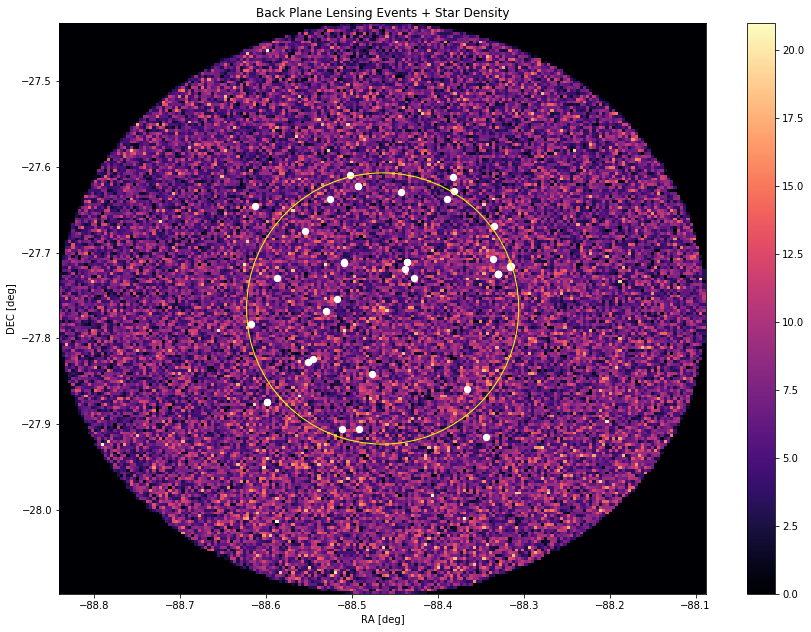

In [90]:
# CROSS MATCHED OGLE DATA BACK PLANE
import astropy.coordinates as coord

OGLE_df=pd.read_csv('/Users/kalgi/Desktop/ngc6540-region-gaia-ogle-xmatch.csv')

OGLE_X_coords = SkyCoord(OGLE_df['ra'],OGLE_df['dec'], unit=(u.deg, u.deg))
OGLE_X_ra = coord.Angle(OGLE_X_coords.ra.degree*u.degree)
OGLE_X_ra = OGLE_X_ra.wrap_at(180*u.degree)
OGLE_X_dec = coord.Angle(OGLE_X_coords.dec.degree*u.degree)

KMT_df=pd.read_csv('/Users/kalgi/Desktop/ngc-6540-region-gaia-kmtnet-xmatch.csv')

KMT_X_coords = SkyCoord(KMT_df['ra'],KMT_df['dec'], unit=(u.deg, u.deg))
KMT_X_ra = coord.Angle(KMT_X_coords.ra.degree*u.degree)
KMT_X_ra = KMT_X_ra.wrap_at(180*u.degree)
KMT_X_dec = coord.Angle(KMT_X_coords.dec.degree*u.degree)

'''
plt.axis([-89, -87, -28, -26])

NGC6540_region1 = plt.Circle((-88.4641667, -27.7653), 0.33, color='r', alpha=0.3) #the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region1)
'''

back_1X = OGLE_df[OGLE_df.distance > 5.375]
back_2X = OGLE_df[OGLE_df.distance < 0]
backplane_X = pd.concat([back_1X,back_2X])

back_1X_KMT = KMT_df[KMT_df.distance > 5.375]
back_2X_KMT = KMT_df[KMT_df.distance < 0]
backplane_X_KMT = pd.concat([back_1X_KMT,back_2X_KMT])


x_back= backplane['RAJ2000']-360
y_back= backplane['DEJ2000']

fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10.5, forward=True)
plt.hist2d(x_back,y_back,bins=(200), cmap='magma')
ax.scatter(x=backplane_X['ra']-360, y=backplane_X['dec'], color='white', s=40)
ax.scatter(x=backplane_X_KMT['ra']-360, y=backplane_X_KMT['dec'], color='white', s=40)
NGC6540_cluster = plt.Circle((-88.4641667, -27.7653), 0.15833, color='yellow', fill=False, label='NGC 6540 9.5 arcmin') #the galactic coordinates with rad of 0.15833 deg
ax.add_patch(NGC6540_cluster)
plt.title("Back Plane Lensing Events + Star Density")
ax.set_xlabel("RA [deg]")
ax.set_ylabel("DEC [deg]")
plt.colorbar()
plt.show()


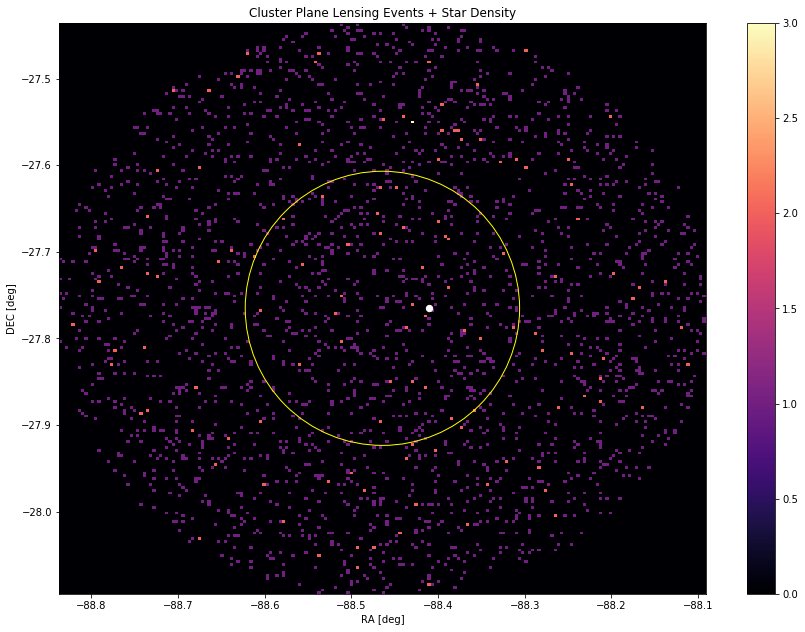

In [91]:
# CROSS MATCHED OGLE DATA CLUSTER PLANE
import astropy.coordinates as coord

OGLE_df=pd.read_csv('/Users/kalgi/Desktop/ngc6540-region-gaia-ogle-xmatch.csv')

OGLE_X_coords = SkyCoord(OGLE_df['ra'],OGLE_df['dec'], unit=(u.deg, u.deg))
OGLE_X_ra = coord.Angle(OGLE_X_coords.ra.degree*u.degree)
OGLE_X_ra = OGLE_X_ra.wrap_at(180*u.degree)
OGLE_X_dec = coord.Angle(OGLE_X_coords.dec.degree*u.degree)

KMT_df=pd.read_csv('/Users/kalgi/Desktop/ngc-6540-region-gaia-kmtnet-xmatch.csv')

KMT_X_coords = SkyCoord(KMT_df['ra'],KMT_df['dec'], unit=(u.deg, u.deg))
KMT_X_ra = coord.Angle(KMT_X_coords.ra.degree*u.degree)
KMT_X_ra = KMT_X_ra.wrap_at(180*u.degree)
KMT_X_dec = coord.Angle(KMT_X_coords.dec.degree*u.degree)

'''
plt.axis([-89, -87, -28, -26])

NGC6540_region1 = plt.Circle((-88.4641667, -27.7653), 0.33, color='r', alpha=0.3) #the galactic coordinates with rad of 0.33 deg
ax.add_patch(NGC6540_region1)
'''

cluster_X = OGLE_df[OGLE_df.distance < 5.375]
cluster_X = cluster_X[cluster_X.distance > 5.225]

cluster_X_KMT = KMT_df[KMT_df.distance < 5.375]
cluster_X_KMT = cluster_X_KMT[cluster_X_KMT.distance > 5.225]

x_mid = cluster['RAJ2000']-360
y_mid = cluster['DEJ2000']

fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10.5, forward=True)
plt.hist2d(x_mid,y_mid,bins=(200), cmap='magma')
ax.scatter(x=cluster_X['ra']-360, y=cluster_X['dec'], color='white', s=40)
ax.scatter(x=cluster_X_KMT['ra']-360, y=cluster_X_KMT['dec'], color='white', s=40)
NGC6540_cluster = plt.Circle((-88.4641667, -27.7653), 0.15833, color='yellow', fill=False, label='NGC 6540 9.5 arcmin') #the galactic coordinates with rad of 0.15833 deg
ax.add_patch(NGC6540_cluster)
ax.set_xlabel("RA [deg]")
ax.set_ylabel("DEC [deg]")
plt.title("Cluster Plane Lensing Events + Star Density")
plt.colorbar()
plt.show()
